# Reševanje enačb

## Uvod

Za uvod si oglejmo spodnji video:

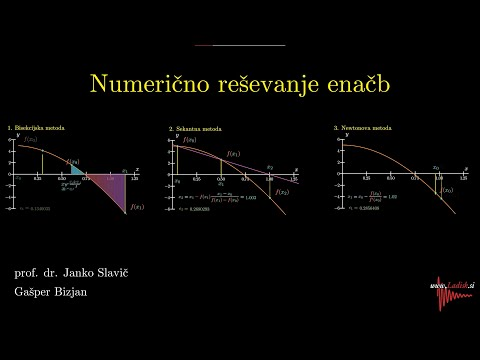

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('17d55KE8SIU', width=800, height=300)

V okviru reševanja enačb obravnavamo poljubno enačbo, ki je odvisna od spremenljivke $x$ in iščemo rešitev:

$$f(x)=0.$$

Rešitvam enačbe rečemo tudi *koreni* (angl. *roots*). Koren enačbe $f(x)=0$ je hkrati tudi ničla funkcije $y=f(x)$.

Funkcija $y=f(x)$ ima lahko ničle stopnje:

* ničla prve stopnje: funkcija seka abscisno os pod neničelnim kotom,
* ničle sode stopnje: funkcija se dotika abscisne osi, vendar je ne seka,
* ničle lihe stopnje: funkcija seka abscisno os, pri ničli stopnje 3 in več imamo prevoj (tangenta je vzporedna z abscisno osjo).

Tukaj je pomembno izpostaviti, da iščemo rešitev poljubne enačbe $f(x)=0$. Če za linearne, kvadratne ali kubične enačbe, lahko določimo analitične rešitve; za večino nelinearnih enačb analitične rešitve ne moremo določiti. Iz tega razloga so numerični pristopi toliko bolj pomembni. 

### Omejitve funkcije $f(x)$

Za funkcijo $y=f(x)$ zahtevamo, da je na zaprtem intervalu $[x_0, x_1]$ zvezna. Pri računanju ničel, se bomo omejili samo na ničle prve stopnje.

### Zgled

Poljubno funkcijo $y=f(x)$ lahko definiramo s *Pythonovo funkcijo*; za zgled tukaj definirajmo polinom:

In [3]:
def f(x):
    return x**3 - 10*x**2 + 5

Ker pa gre za polinom $x^3-10x^2+5$ s koeficienti `[1, -10, 0, 5]` pa je bolje, da ga definiramo s pomočjo [`np.poly1d`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html):

```python
numpy.poly1d(c_or_r, r=False, variable=None)
```

kjer so parametri:

* `c_or_r` koeficienti polinoma s padajočo potenco ali če je `r=True` ničle polinoma,
* `r` je privzeto `False`, kar pomeni, da se podajo koeficienti polinoma,
* `variable` spremenljivka, ki se izpiše pri uporabi funkcije `print()`.

Uvozimo `numpy` in definirajmo polinom:

In [4]:
import numpy as np # uvozimo numpy
f = np.poly1d([1, -10, 0, 5]) # definiramo koeficiente polinoma
print(f) # prikažemo polinom

   3      2
1 x - 10 x + 5


Prikažimo funkcijo $f(x)$:

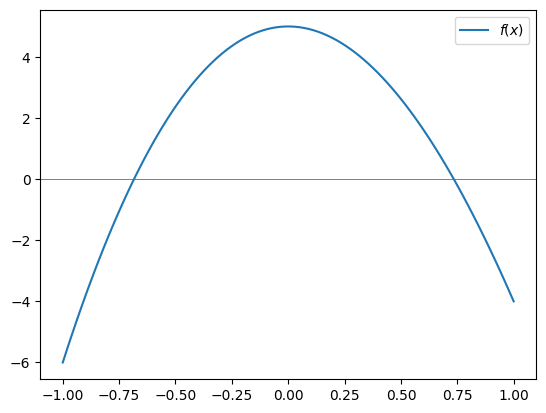

In [5]:
import matplotlib.pyplot as plt       # uvozimo matplotlib
%matplotlib inline
x_r = np.linspace(-1, 1, 100)
plt.axhline(0, color='r', lw=0.5)     # horizontalna črta,
plt.plot(x_r, f(x_r), label='$f(x)$') # da je ničla nekje blizu $x = 0.7$.
plt.legend();

Opazimo, da so ničle funkcije $f(x)$ blizu -0,7 in +0,7. Objekt `poly1d` ima atribut `roots` ali tudi `r` ([glejte dokumentacijo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html)), ki vrne te ničle:

In [6]:
f.r

array([ 9.94949106,  0.73460351, -0.68409457])

V nadaljevanju bo naš cilj numerično določiti ničlo za poljubno funkcijo `f`.

## Inkrementalna metoda

Inkrementalno reševanje temelji na ideji, da v kolikor ima funkcija $f(x)$ pri $x_0$ in $x_1$ različna predznaka, potem je vmes vsaj ena ničla. Zaprti interval $[x_0, x_1]$ razdelimo torej na odseke širine $\Delta x$; na odseku, kjer opazimo spremembo predznaka, je vsaj ena ničla funkcije. 

Metoda je prikazana na sliki.
![Inkrementalna metoda](./fig/inkrementalna.png)

Za ničlo zahtevamo:

$$\left|x_{i+1}-x_i\right|<\varepsilon\quad\textrm{in}\quad \left|f(x_{i+1})\right|+\left|f(x_{i})\right|<D,$$

kjer je $\epsilon$ zahtevana natančnost rešitve in $D$ izbrana majhna vrednost, ki prepreči, da bi kot ničlo razpoznali pol (kar sicer zaradi pogoja zveznosti ni mogoče).

Inkrementalna metoda ima nekatere slabosti:

* je zelo počasna,
* lahko zgreši dve ničli, ki sta si zelo blizu,
* večkratne sode ničle (lokalni ekstrem, ki se samo dotika abscise) ne zazna.

Inkrementalna metoda spada med t. i. *zaprte* (angl. *bracketed*) metode, saj išče ničle funkcije samo na intervalu $[x_0, x_1]$. Pozneje bomo spoznali tudi *odprte* metode, ki lahko konvergirajo k ničli zunaj podanega intervala.

Zaradi vseh zgoraj navedenih slabosti inkrementalno metodo pogosto uporabimo samo za izračun začetnega približka ničle.

### Numerična implementacija

Poglejmo si sedaj inkrementalno iskanje ničel funkcije:

In [7]:
def inkrementalna(fun, x0, x1, dx):
    """ Vrne prvi interval (x1, x2) kjer leži ničla
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :param dx:  inkrement iskanja
    """
    x_d = np.arange(x0, x1, dx)   # pripravimo x vrednosti
    f_d = np.sign(fun(x_d))       # pripravimo predznake funkcije
    f_d = f_d[1:]*f_d[:-1]        # pomnožimo sosednje elemente
    i = np.argmin(f_d)            # prvi prehod skozi ničlo
    # vsota abs funk vrednosti
    x0 = x_d[i]
    x1 = x_d[i+1]
    D = np.abs(fun(x0)) + np.abs(fun(x1))
    return np.asarray([x0, x1]), D

Poglejmo sedaj uporabo na zgoraj definiranem polinomu:

In [8]:
rez_inkr, D = inkrementalna(f, 0., 1., 0.001)
rez_inkr

array([0.734, 0.735])

Ničla je izolirana z natančnostjo 0,001, preverimo še vsoto absolutnih funkcijskih vrednosti:

In [9]:
D

np.float64(0.013071529000000304)

Ugotovimo, da je relativno majhna; bomo pa se s sledečimi metodami trudili rezultat bistveno izboljšati.

Pripravimo sliko:

In [10]:
def fig():
    plt.plot(x_r, f(x_r), label='$f(x)$')
    plt.axhline(0, color='r', lw=0.5)     # horizontalna črta
    plt.axvline(rez_inkr[0], color='r', lw=0.5)     # vertikalna črta
    plt.axvline(rez_inkr[1], color='r', lw=0.5)     # vetrikalna črta
    plt.plot(rez_inkr, f(rez_inkr), 'ro', label='Inkrementalna metoda')
    plt.xlim(0.73,0.74)
    plt.ylim(-0.1, 0.1)
    plt.legend();

Prikažimo rezultat:

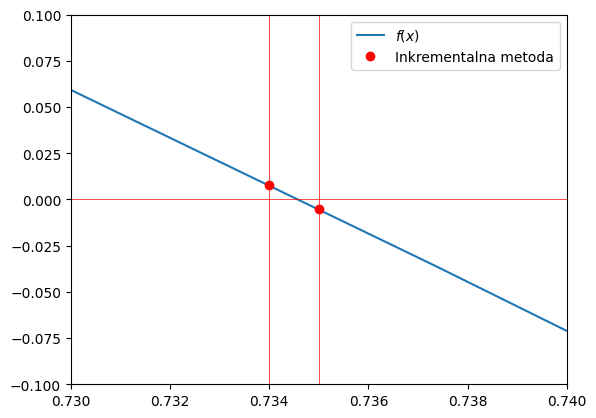

In [11]:
fig()

Da smo torej na intervalu $[0, 1]$ izračunali rešitev z natančnostjo $\Delta x=0,001$, smo morali 1000-krat klicati funkcijo $f(x)$. Gre za zelo neučinkovito metodo, zato bomo iskali boljše načine; najprej s preprostim iterativnim inkrementalnim pristopom. 

## Iterativna inkrementalna metoda

Iterativna inkrementalna metoda v prvi iteraciji z inkrementalno metodo omeji interval iskanja ničel pri relativno velikem koraku. Interval, najden v prvi iteraciji, se v drugi iteraciji razdeli na manjše intervale in ponovi se inkrementalno iskanje ničle. Tretja iteracija se nato omeji na interval določen v drugi in tako dalje. Z iteracijami zaključimo, ko smo dosegli predpisano natančnost rešitve $\epsilon$.

Metoda je prikazana na sliki:
![Iterativna inkrementalna metoda](./fig/iterativna_inkrementalna.png)

### Numerična implementacija

In [12]:
def inkrementalna_super(fun, x0, x1, iteracij=3):
    """ Vrne interval (x0, x1) kjer leži ničla
    
    :param fun: funkcija katere ničlo iščemo
    :param x0:  spodnja meja iskanja
    :param x1:  zgornja meja iskanja
    :iteraci:   število iteracij inkrementalne metode
    """
    for i in range(iteracij):
        dx = (x1 - x0)/10
        x0x1, _ = inkrementalna(fun, x0, x1, dx)
        x0, x1 = x0x1
    # vsota abs funk vrednosti
    D = np.abs(fun(x0)) + np.abs(fun(x1))        
    return np.asarray([x0, x1]), D

S 30 klici funkcije $f(x)$ tako dobimo podobno natančnost kot prej v 1000:

In [13]:
rez30, D30 = inkrementalna_super(f, 0., 1., iteracij=3)
rez30

array([0.734, 0.735])

In [14]:
rez_inkr

array([0.734, 0.735])

Seveda pa lahko natančnost bistveno izboljšamo z večanjem števila iteracij:

In [15]:
rez80, D80 = inkrementalna_super(f, 0., 1., iteracij=8)
rez80

array([0.7346035 , 0.73460351])

Preverimo še kriterij vsote absolutnih funkcijskih vrednosti, ki mora biti majhen:

In [16]:
D80

np.float64(1.3073143190212022e-07)

## Bisekcijska metoda

Na intervalu $[x_0, x_1]$, kjer vemo, da obstaja ničla funkcije (predznaka $f(x_0)$ in $f(x_1)$ se razlikujeta), lahko uporabimo *bisekcijsko metodo*.

Ideja metode je:

* interval $[x_0, x_1]$ razdelimo na pol (od tukaj ime: *bi-sekcija*): $x_2 = (x_0+x_1)/2$,
* če imata $f(x_0)$ in $f(x_2)$ različne predznake, je nov interval iskanja ničle $[x_0, x_2]$, sicer pa: $[x_2, x_1]$,
* glede na predhodni korak definiramo nov zaprt interval $[x_0, x_1]$ in nadaljujemo z iterativnim postopkom, dokler ne dosežemo želene natančnosti $\left|x_1-x_0\right|<\varepsilon$.

Slika metode:
![Bisekcijska metoda](./fig/bisekcijska.png)

Bisekcijska metoda spada med *zaprte* metode, ki vrne ničlo funkcije na podanem intervalu $[x_0, x_1]$.

### Ocena napake

Če v začetku začnemo z intervalom $\Delta x = \left|x_1-x_0\right|$, potem je natančnost bisekcijske metode po prvem koraku bisekcije: 

$$\varepsilon_1 = \Delta x/2,$$

po drugem koraku: 

$$\varepsilon_2 = \Delta x/2^2$$

in po $n$ korakih: 

$$\varepsilon_n = \Delta x/2^n.$$

Ponavadi zahtevamo, da je rešitev podana z natančnostjo $\varepsilon$ in iz zgornje enačbe lahko izpeljemo število potrebnih korakov bisekcijske metode:

$$n = \frac{\log\left(\frac{\Delta x}{\varepsilon}\right)}{\log(2)}.$$

Seveda je število korakov celo število.

### Numerična implementacija

In [17]:
def bisekcija(fun, x0, x1, tol=1e-3, Dtol=1e-1, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničlo iščemo
    :param x0:  spodnja meja iskanja
    :param x1:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :param Dtol:največja vsota absolutnih vrednosti rešitve 
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    if np.sign(fun(x0))==np.sign(fun(x1)):
        raise Exception('Ničla ni izolirana. Root is not bracketed.')
    n = np.ceil( np.log(np.abs(x1-x0)/tol)/np.log(2) ).astype(int) # števil iteracij
    for i in range(n):
        x2 = (x0 + x1) / 2
        f1 = fun(x0)
        f3 = fun(x2)
        f2 = fun(x1)
        if np.sign(fun(x2))!=np.sign(fun(x0)):
            x1 = x2
        else:
            x0 = x2
    D = np.abs(fun(x0)) + np.abs(fun(x1))
    if D > Dtol:
        raise Exception('Verjetnost pola ali več ničel.')
    r = (x0+x1)/2
    if izpis:
        decimalk = int(np.log10(1/tol)) # ne deluje vedno in za vse primere:)    
        print(f'Rešitev: {r:5.{decimalk}f}, število iteracij: {n:g}, D: {D:5.5f}')
    return r

Sedaj poskusimo najti ničlo z natančnostjo `1e-3`:

In [18]:
bisekcija(f, 0, 1, tol=1e-3);

Rešitev: 0.735, število iteracij: 10, D: 0.01277


V desetih iteracijah smo dobili isto natančen rezultat kakor zgoraj pri iterativni inkrementalni metodi `rez30`. Poglejmo še izračun ničle s še večjo natančnostjo:

In [19]:
bisekcija(f, 0, 1, tol=1e-6);

Rešitev: 0.734603, število iteracij: 20, D: 0.00001


Hitrost izvajanja lahko preverimo s t. i. *magic funkcijo* ``timeit`` ([dokumentacija](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)), ki večkrat požene funkcijo in analizira čas izvajanja. Če je pred magic funkcijo dvojni znak `%%`, se izvede in meri čas celotne celice, če pa le enojni `%`, pa samo ene vrstice.

In [20]:
%%timeit
bisekcija(f, 0., 1., izpis=False)

283 μs ± 6.88 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Iskanje ničle v okolici pola
Poglejmo sedaj iskanje ničle funkcije ``tan`` v okolici pola (ničla dejansko ne obstaja):

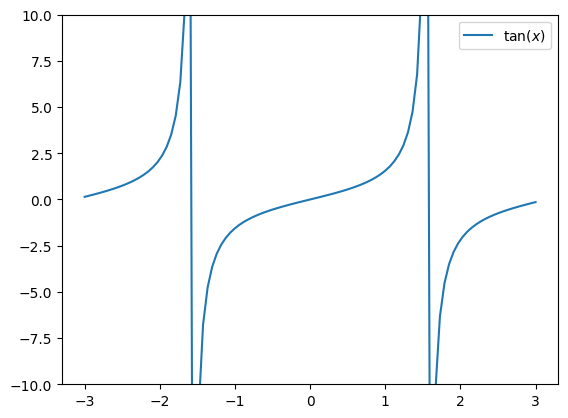

In [21]:
x_t = np.linspace(-3, 3, 100)
plt.plot(x_t, np.tan(x_t), label='$\\tan(x)$')
plt.ylim(-10, 10)
plt.legend();

V primeru iskanja na intervalu $[-1, 1]$ najdemo pravo ničlo:

In [22]:
bisekcija(np.tan, -1, 1, tol=1e-3);

Rešitev: -0.000, število iteracij: 11, D: 0.00098


V primeru iskanja v okolici pola, pa nas program na to opozori (klic funkcije je tukaj zakomentiran, sicer se avtomatsko generiranje tukaj prekine):

In [23]:
## bisekcija(np.tan, -3, 0, tol=1e-6)

V ``scipy`` vgrajena bisekcijska metoda takega preverjanja nima (zaradi hitrosti) in bo vrnila rezultat, ki bo pa napačen. Pri uporabi moramo torej biti previdni.

### Uporaba ``scipy.optimize.root_scalar``

Bisekcijska metoda je *počasna*, vendar zanesljiva metoda iskanja ničel in je implementirana znotraj ``scipy``. Najprej jo uvozimo:

In [24]:
from scipy.optimize import root_scalar

```python
root_scalar(f, args=(), method='bisect', bracket=[a,b], fprime=None, fprime2=None, x0=None, x1=None,xtol=None, rtol=None, maxiter=None, options=None)
```

Da s funkcijo `root_scalar` prikličemo bisekcijsko metodo moramo funkciji podati tri parametre: funkijo `f` ter zaprti interval `[a, b]` (prek parametra `bracket`). Predznaka `f(a)` in `f(b)` morata biti različna. Ostali parametri, npr. absolutna `xtol` in relativna `rtol` napaka ter največje število iteracij `maxiter` so opcijski - imajo privzete vrednosti. Za več glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html).

Poglejmo uporabo:

In [25]:
root_scalar(f, bracket=[0, 1], method='bisect')

      converged: True
           flag: converged
 function_calls: 41
     iterations: 39
           root: 0.7346035077880515
         method: bisect

in hitrost:

In [26]:
%timeit root_scalar(f, bracket=[0, 1], method='bisect')

270 μs ± 19.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Preverimo še lahko funkcijo `tan(x)`, najprej na intervalu, kjer je funkcija zvezna:

In [27]:
root_scalar(np.tan, bracket=[-1, 1], method='bisect')

      converged: True
           flag: converged
 function_calls: 3
     iterations: 1
           root: 0.0
         method: bisect

Potem še v okolici pola, kjer ni zvezna:

In [28]:
root_scalar(np.tan, bracket=[-3, -1], method='bisect')

      converged: True
           flag: converged
 function_calls: 42
     iterations: 40
           root: -1.5707963267941523
         method: bisect

kar je napačna rešitev!

## Sekantna metoda

Sekantna metoda zahteva dva začetna približka $x_0$ in $x_1$ in funkcijo $f(x)$. Ob predpostavki linearne interpolacije med točkama $x_0, f(x_0)$ in $x_1, f(x_1)$ (skozi točki potegnemo *sekanto*, od tukaj tudi ime), se določi $x_2$, kjer ima linearna interpolacijska funkcija ničlo. $x_2$ predstavlja nov približek ničle.


Glede na sliko:
![Sekantna metoda](./fig/sekantna.png)

lahko zapišemo (podobna trikotnika sta na sliki označena z rumeno):

$$\frac{f(x_1)}{x_2 − x_1}= \frac{f(x_0) − f(x_1)}{x_1 − x_0}.$$

Sledi, da je nov približek ničle:

$$x_2= x_1-f(x_1)\,\frac{x_1 − x_0}{f(x_1) - f(x_0)}.$$

V naslednjem koraku pri sekantni metodi izvedemo sledeče zamenjave: $x_0=x_1$ in $x_1=x_2$.

Sekantna metoda spada med *odprte* metode, saj lahko najde ničlo funkcije, ki se nahaja zunaj območja $[x_0, x_1]$.

### Ocena napake

Konzervativno lahko napako ocenimo iz razlike med dvema zaporednima približkoma:

$$\varepsilon = \left|x_{n-1} -x_{n}\right|$$

### Konvergenca in red konvergence

Konvergenca pomeni, da zaporedje približkov konvergira k rešitvi enačbe $\alpha$ ($\alpha$ je rešitev enačbe).

**Red konvergence** označuje hitrost konvergiranja. 

Če $\varepsilon$ označimo napako približka in napako z vsakim korakom iteracije linearno zmanjšamo ($C$ je konstanta):

$$\varepsilon_n = C\,\varepsilon_{n-1}^1,$$

govorimo o **redu konvergence 1** ($\varepsilon$ ima potenco 1)!

Pri predhodno obravnavani bisekcijski metodi napako na vsakem koraku zmanjšamo za $1/2$ ($\varepsilon_n/\varepsilon_{n-1} = C = 1/2$). *Bisekcijska metoda ima red konvergence 1.* 

Red konvergence *sekantne metode je višji* in jo je mogoče oceniti z: 

$$\varepsilon_n = C\,\varepsilon_{n-1}^{1.618}.$$

Iz zgornje ocene sledi, da se na vsakem koraku iteracije število točnih cifer poveča za približno 60%. Ker je red konvergence višji od 1 in manjši od kvadratične, tako konvergenco imenujemo *superlinearna* konvergenca.

### Numerična implementacija

In [30]:
def sekantna(fun, x0, x1, tol=1e-3, Dtol=1e-1, max_iter=50, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničlo iščemo
    :param x0:  spodnja meja iskanja
    :param x1:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :param Dtol:največja vsota absolutnih vrednosti rešitve 
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    if np.sign(fun(x0))==np.sign(fun(x1)):
        raise Exception('Ničla ni izolirana. Root is not bracketed.')
    for i in range(max_iter):
        f0 = fun(x0)
        f1 = fun(x1)
        x2 = x1 - f1 * (x1 - x0)/(f1 - f0)
        x0 = x1
        x1 = x2
        if izpis:
            print('{:g}. korak: x0={:g}, x1={:g}.'.format(i+1, x0, x1))
        if np.abs(x1-x0)<tol:
            r = (x0+x1)/2
            D = np.abs(fun(x0)) + np.abs(fun(x1))
            if D > Dtol:
                raise Exception('Verjetnost pola ali več ničel.')
            r = (x0+x1)/2
            if izpis:
                decimalk = int(np.log10(1/tol)) # ne deluje vedno in za vse primere:)    
                print(f'Rešitev: {r:5.{decimalk}f}, D: {D:5.5f}')
            return r        

Poglejmo si uporabo:

In [31]:
sekantna(f, 0, 1., tol=1.e-8, izpis=True);

1. korak: x0=1, x1=0.555556.
2. korak: x0=0.555556, x1=0.707845.
3. korak: x0=0.707845, x1=0.737957.
4. korak: x0=0.737957, x1=0.734549.
5. korak: x0=0.734549, x1=0.734603.
6. korak: x0=0.734603, x1=0.734604.
7. korak: x0=0.734604, x1=0.734604.
Rešitev: 0.73460351, D: 0.00000


in hitrost

In [32]:
%timeit sekantna(f, 0, 1., tol=1.e-8, izpis=False)

145 μs ± 9.4 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Kakor smo zapisali zgoraj, je sekantna metoda odprtega tipa. Rešitev enačbe je lahko zunaj podanega intervala. Poglejmo si primer:

In [33]:
sekantna(np.tan, 1, 2);

1. korak: x0=2, x1=1.41615.
2. korak: x0=1.41615, x1=1.85165.
3. korak: x0=1.85165, x1=1.69887.
4. korak: x0=1.69887, x1=1.97485.
5. korak: x0=1.97485, x1=2.09379.
6. korak: x0=2.09379, x1=2.43519.
7. korak: x0=2.43519, x1=2.76579.
8. korak: x0=2.76579, x1=3.05013.
9. korak: x0=3.05013, x1=3.13625.
10. korak: x0=3.13625, x1=3.14158.
11. korak: x0=3.14158, x1=3.14159.
Rešitev: 3.142, D: 0.00002


### Uporaba ``scipy.optimize.root_scalar``

Znotraj ``scipy`` je sekantna metoda definirana v okviru ``scipy.optimize.root_scalar`` funkcije:

In [40]:
root_scalar(f, x0=1, method='secant')

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: 0.7346035077893033
         method: secant

V primeru sekantne metode, se druga meja intervala izračuna glede na kodo:
```python
if x0 >= 0:
    x1 = x0*(1 + 1e-4) + 1e-4
else:
    x1 = x0*(1 + 1e-4) - 1e-4
```

Poglejmo še hitrost

In [41]:
%timeit root_scalar(f, x0=1, method='secant')

90.9 μs ± 1.82 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Sorodna sekantni metodi je *Ridderjeva*  metoda; v podrobnosti metode tukaj ne gremo, je pa zaprtega tipa, ima kvadratičen red konvergence ter jo kličemo s pomočjo funkcije `root_scalar`:

In [42]:
root_scalar(f, bracket=[0, 1], method='ridder')

      converged: True
           flag: converged
 function_calls: 14
     iterations: 6
           root: 0.7346035077883111
         method: ridder

## Newtonova metoda

V literaturi za **Newtonovo** metodo tudi najdemo izraza **tangentna** in **Newton-Raphsonova** metoda. Potrebuje en začetni približek $x_0$, poleg definicije funkcije $f(x)$ pa tudi njen odvod $f'(x)$. 

Princip delovanja metode je prikazan na sliki:
![Newtonova metoda](./fig/newtonova.png)

Metodo bi lahko izpeljali grafično (s  slike), tukaj pa si poglejmo izpeljavo s pomočjo Taylorjeve vrste:

$$f(x_{i+1})=f(x_i)+f'(x_i)\,\left(x_{i+1}-x_i\right)+O^2\left(x_{i+1}-x_i\right),$$

če naj bo pri $x_{i+1}$ vrednost funkcije nič, potem velja:

$$0=f(x_i)+f'(x_i)\,\left(x_{i+1}-x_i\right)+O^2\left(x_{i+1}-x_i\right).$$

Naredimo napako metode in zanemarimo člene višjega reda v Taylorjevi vrsti. Lahko izpeljemo:

$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}.$$

$x_{i+1}$ je tako nov približek iskane ničle. 

Algoritem Newtonove metode je:

1. izračunamo nov približek $x_{i+1}$,
2. računanje prekinemo, če je največje število iteracij doseženo (rešitve enačbe nismo našli),
3. če velja $\left|x_{i+1}-x_i\right|<\varepsilon$ računanje prekinemo (izračunali smo približek ničle), sicer povečamo indeks $i$ in gremo v prvi korak.

Opombi:

* $\varepsilon$ je zahtevana absolutna natančnost,
* *Newtonova* metoda lahko divergira, zato v algoritmu predpišemo največje število iteracij.

Zgoraj smo omenili, da je Newtonova metoda ena izmed boljših metod za iskanje ničel funkcij. Ima pa tudi nekaj slabosti/omejitev:

* spada med *odprte* metode, 
* kvadratična konvergenca je zagotovljena le v dovolj majhni okolici rešitve enačbe,
* poznati moramo odvod funkcije.

### Red konvergence

Red konvergence Newtonove metode je kvadraten: 

$$\varepsilon_n = C\,\varepsilon_{n-1}^{2},$$

kjer je $C$:

$$C=-\frac{f''(x)}{2\,f'(x)}.$$

Konvergenca je torej hitra, v vsaki novi iteraciji se število točnih števk v približku podvoji.

### Numerična implementacija

In [43]:
def newtonova(fun, dfun, x0, tol=1e-3, Dtol=1e-1, max_iter=50, izpis=True): 
    # ime `newtonova` zato ker je `newton` vgrajena funkcija v `scipy`
    """ Vrne ničlo z natančnostjo tol
    
    :param fun:  funkcija katere ničlo iščemo
    :param dfun: f'
    :param x0:   začetni približek
    :param tol:  zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :param Dtol:največja vsota absolutnih vrednosti rešitve 
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    for i in range(max_iter):
        x1 = x0 - fun(x0)/dfun(x0)
        if np.abs(x1-x0)<tol:
            r = (x0+x1)/2
            D = np.abs(fun(x0)) + np.abs(fun(x1))
            if D > Dtol:
                raise Exception('Verjetnost pola ali več ničel.')
            if izpis:
                decimalk = int(np.log10(1/tol)) # ne deluje vedno in za vse primere:)    
                print(f'Rešitev: {x1:5.{decimalk}f}, število iteracij: {i+1}, D: {D:5.8f}')
            return x1
        x0 = x1
    raise Exception('Metoda po {:g} iteracijah ne konvergira'.format(max_iter))

Definirajmo polinom `f` in njegov prvi odvod `df`:

In [44]:
def f(x):
    return x**3 - 10*x**2 + 0*x + 5
def df(x):
    return 3*x**2 - 20*x

Izračunajmo sedaj ničlo:

In [45]:
newtonova(fun=f, dfun=df, x0=1, tol=1e-8);

Rešitev: 0.73460351, število iteracij: 5, D: 0.00000000


Preverimo hitrost izvajanja:

In [46]:
%timeit newtonova(fun=f, dfun=df, x0=1, tol=1e-8, izpis=False)

6.36 μs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Uporaba ``scipy.optimize.root_scalar``

Znotraj ``scipy`` je Newtonova metoda definirana v okviru ``scipy.optimize.root_scalar`` funkcije:

In [48]:
root_scalar(f, x0=1, method='newton', fprime=df)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 5
           root: 0.7346035077893033
         method: newton

In izmerimo hitrost:

In [49]:
%timeit root_scalar(f, x0=1, method='newton', fprime=df)

57.2 μs ± 8.38 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Če pri `root_scalar` podamo tudi drugi odvod `fprime2`, se uporabi Halleyeva metoda, ki temelji na izrazu:

$$x_{n+1}=x_{n}-\frac{2f(x_{n})f'(x_{n})}{2\,f'^{2}(x_{n})-f(x_{n})f''(x_{n})}$$

In [50]:
def ddf(x):
    return 6*x - 20

In [ ]:
root_scalar(f, x0=1, method='halley', fprime=df, fprime2=ddf)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 3
           root: 0.7346035077893033
         method: halley

In hitrost:

In [54]:
%timeit root_scalar(f, x0=1, method='halley', fprime=df, fprime2=ddf)

38.7 μs ± 4.07 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Poglejmo si primer uporabe Newtonove metode v `scipy.optimize`:

## Reševanje sistemov nelinarnih enačb*

Rešujemo sistem enačb, ki ga v vektorski obliki zapišemo takole:

$$\mathbf{f}(\mathbf{x})=\mathbf{0}.$$

V skalarni obliki zgornji vektorski izraz zapišemo:

$$\begin{array}{rcl}
f_0(x_0,x_1,\dots, x_{n-1})&=&0\\
f_1(x_0,x_1,\dots, x_{n-1})&=&0\\
&\vdots&\\
f_{n-1}(x_0,x_1,\dots, x_{n-1})&=&0.\\
\end{array}$$

Reševanje sistema $n$ nelinearnih enačb je bistveno bolj zahtevno kot reševanje ene same nelinearne enačbe. Tak sistem enačb ima lahko več rešitev in katero izračunamo, je odvisno od začetnih pogojev. Ponavadi nam pri dobri izbiri začetnih pogojev pomaga fizikalni problem, ki ga rešujemo.

Za računanje rešitve sistema enačb se *Newtonova* metoda izkaže kot najenostavnejša in pogosto tudi najboljša (obstajajo tudi druge metode, ki pa so velikokrat variacije Newtonove metode).

Podobno kot pri izpeljavi Newtonove metode za reševanje ene enačbe, tudi tukaj začnemo z razvojem funkcije $f_i$ v Taylorjevo vrsto:

$$f_i(\mathbf{x}+\Delta \mathbf{x})=f_i(\mathbf{x})+\sum_{j=1}^n \frac{\partial f_i}{\partial x_j}\,\Delta x_j+O^2(\mathbf{\Delta x}).$$

Naredimo napako metode, ko zanemarimo člene drugega in višjih redov ter zapišemo izraz v matrični obliki:

$$\mathbf{f}(\mathbf{x}+\Delta \mathbf{x})=\mathbf{f}(\mathbf{x})+\mathbf{J}(\mathbf{x})\,\Delta \mathbf{x},$$

kjer je $\mathbf{J}(\mathbf{x})$ *Jakobijeva* matrika pri vrednostih $\mathbf{x}$. Elementi Jakobijeve matrike so: 

$$J_{ij}=\frac{\partial f_i}{\partial x_j}.$$

Če naj bo $\mathbf{x}+\Delta \mathbf{x}$ rešitev sistema enačb, mora veljati:

$$\mathbf{0}=\mathbf{f}(\mathbf{x})+\mathbf{J}(\mathbf{x})\,\Delta \mathbf{x}$$

in torej sledi:

$$\mathbf{J}(\mathbf{x})\,\Delta \mathbf{x}=-\mathbf{f}(\mathbf{x}).$$

Izpeljali smo sistem linearnih enačb, matrika koeficientov je označena z $\mathbf{J}(\mathbf{x})$, vektor neznank je $\Delta\mathbf{x}$ in vektor konstant $-\mathbf{f}(\mathbf{x}).$

Opomba: analitično računanje Jakobijeve matrike je lahko zamudno in zato jo pogosto približno izračunamo pri $\mathbf{x}$ numerično:

$$\frac{\partial f_i}{\partial x_j}\approx
\frac{f_i(\mathbf{x}+\mathbf{e}_j\,h)-f_i(\mathbf{x})}{h},$$

kjer je $h$ majhen premik in je $\mathbf{e}_j$ enotski pomik v smeri $x_j$. Če se Jakobijeva matrika izračuna numerično, govorimo o sekantni metodi in ne Newtonovi.

Pri numeričnem izračunu si lahko pomagamo s funkcijo ``scipy.optimize.approx_fprime`` (za podrobnosti glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.approx_fprime.html)).

### Numerična implementacija

Algoritem torej je:

1. Izberemo začetni približek $\mathbf{x}_0$, največje število iteracij in postavimo indeks na nič: $i=0$.
2. Izračunamo Jakobijevo matriko $\mathbf{J}(\mathbf{x_i})$ in rešimo linearni sistem: $\mathbf{J}(\mathbf{x}_i)\,\Delta \mathbf{x}_i=-\mathbf{f}(\mathbf{x}_i)$.
3. Izračunamo nov približek: $\mathbf{x}_{i+1}=\mathbf{x}_{i}+\Delta\mathbf{x}_i$.
4. Če je napaka manjša od zahtevane, se postopek prekine*. Postopek prekinemo tudi, če je število iteracij večje od dovoljenega, sicer povečamo indeks $i=i+1$ in se vrnemo v korak 2. 

\* Opomba:

Napako lahko ocenimo z normo razlike dveh zaporednih približkov:

$$\sum_j^{n-1}\left|x_{i,j}-x_{i-1,j}\right|<\varepsilon,$$

kjer je $i$ indeks iteracije in $j$ indeks elementa.

### Uporaba ``scipy.optimize.root``

Funkcija ``scipy.optimize.root`` ima obsežno [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) in omogoča večje število različnih pristopov:

```python
root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
```

Če uporabimo privzete parametre, moramo definirati zgolj vektorsko funkcijo `fun` in začetno vrednost `x0`.

Uvozimo funkcijo:

In [55]:
from scipy.optimize import root

Poglejmo si uporabo na zgledu (gre za zgled na str. 76, Jože Petrišič, Reševanje enačb, 1996, FS, UNI-LJ):

$$f_0(\mathbf{x})=x_0^2+x_0\,x_1-10=0,$$
$$f_1(\mathbf{x})=x_1+3\,x_0\,x_1^2-57=0,$$

kjer je vektor $\mathbf{x}=[x_0, x_1]$.

Najprej definirajmo Python funkcijo, ki vrne seznam rezultatov funkcij $[f_0(\mathbf{x}),f_1(\mathbf{x})]$:

In [56]:
def func(x):
    return [x[0]**2 + x[0]*x[1] -10,
            x[1] +3*x[0]*x[1]**2 - 57]

Definirajmo še Jakobijevo matriko:

In [57]:
def J(x):
    return np.array([[2*x[0]+x[1], x[0]],
                     [3*x[1]**2,   1+6*x[0]*x[1]]])

Uporabimo začetne vrednosti $x_0=1,5$ in $x_1=3,5$ ter rešimo problem:

In [58]:
rešitev = root(fun=func, x0=[1.5, 3.5], jac=J)
rešitev

 message: The solution converged.
 success: True
  status: 1
     fun: [-6.972e-12  3.148e-11]
       x: [ 2.000e+00  3.000e+00]
  method: hybr
    nfev: 12
    njev: 1
    fjac: [[-2.235e-01 -9.747e-01]
           [ 9.747e-01 -2.235e-01]]
       r: [-2.954e+01 -3.782e+01 -6.940e+00]
     qtf: [-2.836e-08 -1.324e-08]

Funkcija `root` vrne obsežen rezultat. Najbolj pomembna sta atribut `x`, ki predstavlja iskano rešitev, in atribut `success`, ki pove, ali je rešitev konvergirala:

In [59]:
rešitev.x

array([2., 3.])

In [60]:
rešitev.success

True

## Nekaj vprašanj za razmislek!

1. V simbolni obliki definirajte izraz:
$$f(x) = x^4 - 6.4\,x^3 + 6.45\,x^2 + 20.538\,x - 31.752.$$
2. Narišite funkcijo $f(x)$. Koliko ničel pričakujemo za funkcijo $f(x)$?
3. V simbolni obliki določite ničlo polinoma $f(x)$ (uporabite sympy).
4. Kako preverimo, ali je ničla ekstrem?
5. Numerično najdite vse ničle z bisekcijsko metodo (uporabite ``scipy``).
6. Numerično najdite vse ničle s sekantno metodo (uporabite ``scipy``).
7. Numerično najdite vse ničle z Newtonovo metodo (uporabite ``scipy``).
8. Podatke: $x=[0, 1, 2, 3, 4, 5]$, $y=[0.95, 0.93, 0.87, 0.77, 0.64, 0.49]$ aproksimirajte s funkcijo $\cos(a\,x)$ (z uporabo ``scipy.optimize.curve_fit`` določite konstanto $a$).
9. Na intervalu $x=[0, 50]$ z bisekcijsko metodo poiščite vse ničle najdene funkcije $\cos(a\,x)$.
10. Na intervalu $x=[0, 50]$ z Newtonovo metodo poiščite vse ničle najdene funkcije $\cos(a\,x)$.
11. S pomočjo ``sympy`` najdite simbolno rešitev za:
$$x^2 + y -2=0\qquad\textrm{in}\qquad  y^2 - 4=0.$$
12. Zgoraj definirani problem rešite še numerično s pomočjo ``scipy.optimize.root``.
13. Na predhodnem vprašanju preizkusite različne metode (glejte pomoč).
14. Z uporabo bisekcijske metode dimenzionirajte prikazani upogibno obremenjeni nosilec dolžine $L$ (obremenjen s točkovno silo $F$). Določite velikost polnega krožnega prereza $d$.
![Numerično iskanje ničel](./fig/nal-num_iskanje_nicel-1.jpg)
    $F = 1 \mathrm{kN}$
    
    $L = 1 \mathrm{m}$<br>
    $\sigma_{dop} = 120 \mathrm{MPa}$
    
    Reševanje: 
    
    $\sigma_u \leq \sigma_{dop} \to \frac{F\,L}{W} = \frac{F\,L\,32}{\pi\,d^3} = \sigma_{dop}$

## Dodatno

Tisti, ki ste navdušeni nad [Raspberry Pi](https://www.raspberrypi.org/) in uporabljate njihovo kamero (npr. [tole brez infrardečega filtra](https://www.raspberrypi.org/products/pi-noir-camera/)), vas bo morebiti zanimala knjižnica [picamera](http://picamera.readthedocs.org/).

### Uporaba ``sympy.solve`` za reševanje enačb

Za manjše sisteme lahko rešitev najdemo tudi simbolno. Poglejmo si zgornji primer:

In [48]:
import sympy as sym
sym.init_printing()
x, y = sym.symbols('x, y')
funkcije = [x**2 + x*y -10, y + 3*x*y**2 -57]
funkcije

In [49]:
sol = sym.solve(funkcije, x, y)
print(f'Število rešitev: {len(sol)}')
print(f'Prva rešitev: {sol[0]}')

Število rešitev: 4
Prva rešitev: (2, 3)
